<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_06_interpolacion.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 6
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

__Activity__:  Movement with uniform acceleration
1. Define a polynomial for the movement with uniform acceleration:
\begin{align}
x(t)=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2 \,,
\end{align}
2. Use the previous formula expressed as polynomial of degree 2, to solve the following problem with `np.poly1d`: 
    * A car departs from rest with a constant acceleration of $6\text{m}\cdot\text{s}^{-2}$ and travels through a flat and straight road. 10 seconds later a second pass for the same starting point and in the same direction with an initial speed of $10\text{m}\cdot\text{s}^{-1}$ and a constant acelleration of $10\text{m}\cdot\text{s}^{-2}$. Find the time and distance at which the two cars meet. *
    
Utilizar la fórmula anterior expresada como polinomio de grado 2, para resolver el siguiente problema con np.poly1d:
Un automóvil parte del reposo con una aceleración constante de 6m⋅s−2 y viaja por una carretera plana y recta. 10 segundos después un segundo carro pasa por el mismo punto de partida y en la misma dirección con una velocidad inicial de 10m⋅s−1 y una aceleración constante de 10m⋅s−2. Halla el tiempo y la distancia a la que se encuentran los dos autos. *
_Hint_. 
\begin{align}
x(t)=x_0-v_0t_0+\frac{1}{2}at_0^2 +(v_0-at_0)t+\tfrac{1}{2} a t^2 
\end{align}



In [95]:
import numpy as np
from scipy.interpolate import lagrange
from scipy import interpolate
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [54]:
def x(t,x0,v0,t0,a):
  return x0+v0*(t-t0)+(1/2)*a*(t-t0)**2
#Carro A:
a=6 #m/s^2
t0=0 #s
v0=0
x0=0

#Carro B:
t0_2=10 #s
v0_2=10 #m/s
a_2=10 #m/s^2
x0_2=0

In [28]:
x_1 = np.poly1d([1/2*a, v0, x0-1/2*a*t0**2], variable='t') #Como t0 es 0, escribimos directamente la variable t
print(np.poly1d(x_1))

#Evaluamos la posición en la que estará el carro A a los 10 segundos
print('La posición del carro A cuando pasa por el punto de partida el carro B es en', x_1(t-t0))

   2
3 t
La posición del carro A cuando pasa por el punto de partida el carro B es en 300.0


In [55]:
#Para el carro B:
x_2 = np.poly1d([1/2*a_2, v0_2-v0_2*t0_2, x0_2+(1/2*a_2*t0_2**2)-(v0_2*t0_2)], variable='t')
print(x_2)

   2
5 t - 90 t + 400


In [59]:
tiempo=np.roots(x_2-x_1)
print('El tiempo que les toma encontrarse es de:',tiempo[0])

El tiempo que les toma encontrarse es de: 40.0


In [58]:
distancia=x_1(tiempo[0])
print('La distancia entre los carros es de:',distancia)

La distancia entre los carros es de: 4800.0


__Activity__: For  the function $f(x) = \tan (x)$ between $-\frac{\pi}{4}$ and $\frac{\pi}{4}$ using $N=10$ points (9 intervals). Plot both, the interpolation and the original function.

Explore the behaviour of the Linear Interpolation algorithm when varying the number of data used.



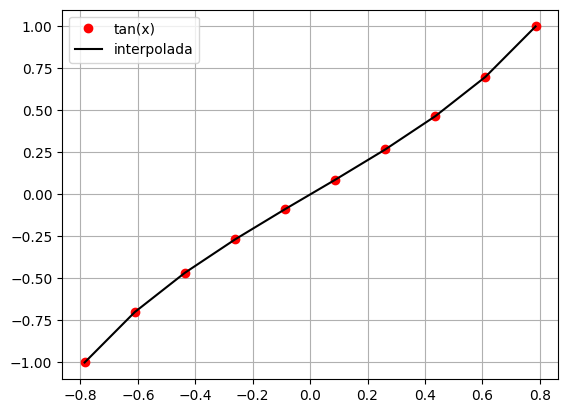

In [83]:
def f(x):
  return np.tan(x)
N = 10
x_t = np.linspace(-np.pi/4, np.pi/4, N)

f_i=interpolate.interp1d(x_t,f(x_t))

plt.plot(x_t, f(x_t),'ro', label='tan(x)')
plt.plot(x_t,f_i(x_t),'k-',label='interpolada')
plt.legend()
plt.grid()
plt.show()

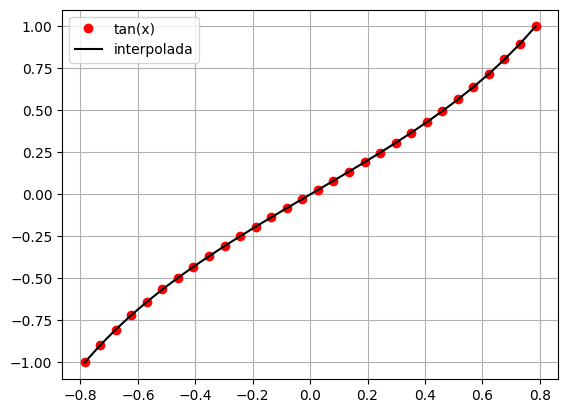

In [96]:
N = 30
x_t = np.linspace(-np.pi/4, np.pi/4, N)

f_i=interpolate.interp1d(x_t,f(x_t))

plt.plot(x_t, f(x_t),'ro', label='tan(x)')
plt.plot(x_t,f_i(x_t),'k-',label='interpolada')
plt.legend()
plt.grid()
plt.show()

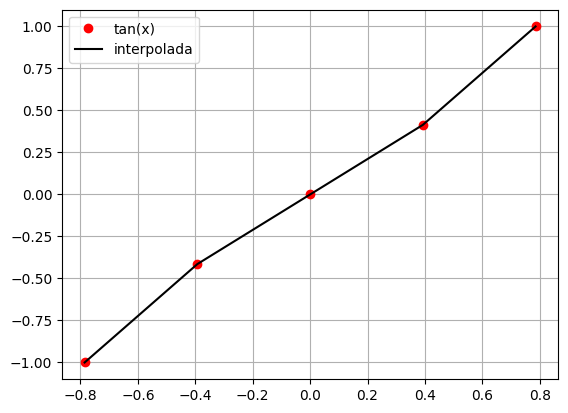

In [85]:
N=5
x_t = np.linspace(-np.pi/4, np.pi/4, N)

f_i=interpolate.interp1d(x_t,f(x_t))

plt.plot(x_t, f(x_t),'ro', label='tan(x)')
plt.plot(x_t,f_i(x_t),'k-',label='interpolada')
plt.legend()
plt.grid()
plt.show()

Vemos como varia la curva de la interpolación conforme cambiamos la cantidad de valores tomados N, siendo más suave mientras aumenta el N

__Activity__: Apply lagrange interpolations with the following points, work with pandas data frame


x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

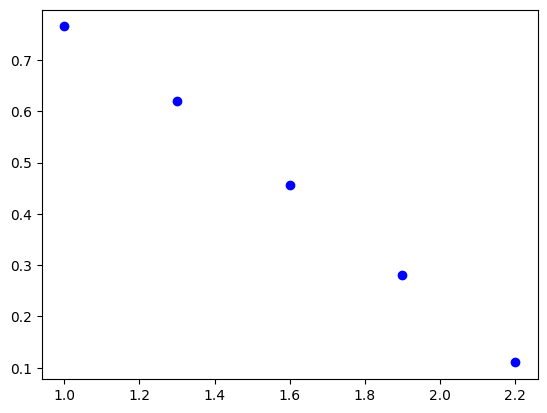

In [86]:
x_ = np.array([1, 1.3, 1.6, 1.9, 2.2])
fx = np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

plt.plot(x_,fx,"bo")

In [90]:
p_l=lagrange(x_,fx)
print(p_l)

          4           3         2
0.001825 x + 0.05529 x - 0.343 x + 0.07339 x + 0.9777


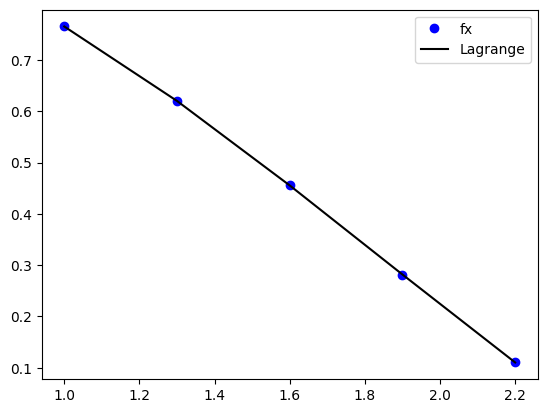

In [93]:
plt.plot(x_,fx, 'bo',label='fx')
plt.plot(x_,p_l(x_), 'k', label='Lagrange') 
plt.legend()



__Activity__: Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.


![img](https://github.com/hernansalinas/autogrades/blob/main/Actividades_clase/imagenes/planetario.png?raw=true)
1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

In [ ]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://www.turismodeestrellas.com/media/files/1973_planetario-medellin.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
planetarios=np.array(img)
planetarios

array([[[124, 129, 133],
        [125, 130, 134],
        [122, 127, 131],
        ...,
        [ 31,  36,  42],
        [ 39,  46,  52],
        [ 56,  63,  69]],

       [[129, 134, 138],
        [124, 129, 133],
        [118, 123, 127],
        ...,
        [ 32,  37,  43],
        [ 42,  49,  55],
        [ 62,  69,  75]],

       [[123, 126, 133],
        [119, 122, 129],
        [118, 121, 128],
        ...,
        [ 33,  38,  44],
        [ 45,  52,  58],
        [ 61,  68,  74]],

       ...,

       [[100, 100, 100],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [ 84,  86,  85],
        [109, 109, 109],
        [142, 142, 142]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [ 35,  37,  36],
        [ 40,  40,  40],
        [ 50,  50,  50]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [ 28,  30,  29],
        [ 31,  31,  31],
        [ 32,  32,  32]]

In [ ]:
plt.imshow(planetarios)

In [ ]:
%matplotlib notebook

<IPython.core.display.Javascript object>


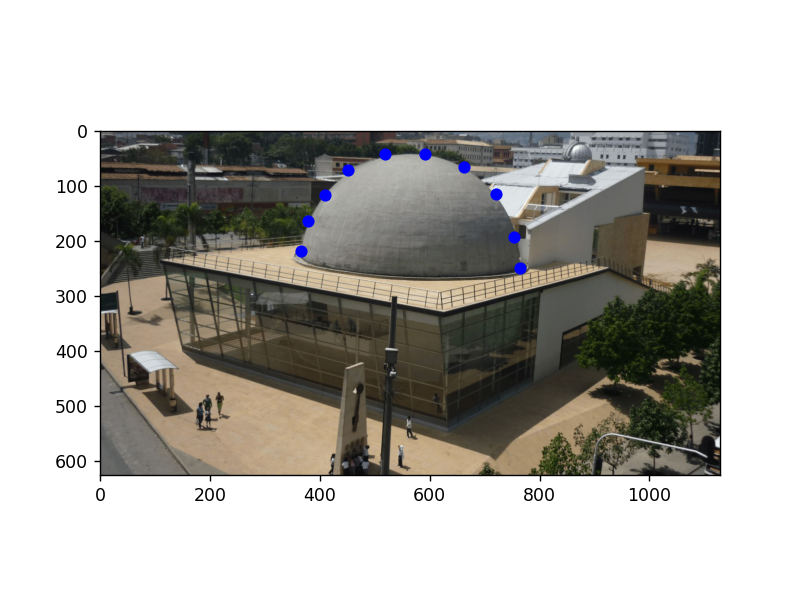

In [ ]:
plt.imshow(planetarios)

In [ ]:
x=np.array([366,378,410,451,519,592,663,720,754,765])
y=np.array([218,163,117,71,42,41,66,114,192,249])
plt.plot(x,y,"bo")

In [ ]:
poly_p = lagrange(x, y)
print(poly_p) 

            9             8             7             6             5
-1.387e-18 x + 7.394e-15 x - 1.736e-11 x + 2.354e-08 x - 2.034e-05 x
           4         3        2
 + 0.0116 x - 4.367 x + 1047 x - 1.45e+05 x + 8.845e+06


In [ ]:
pc=CubicSpline(x,y)
print(pc)

<IPython.core.display.Javascript object>


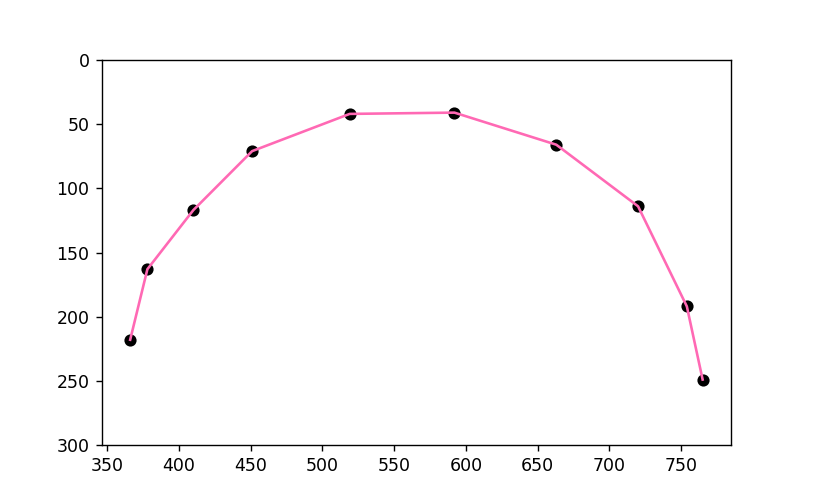

In [ ]:
fig, ax= plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'ko')
ax.plot(x, pc(x),color="hotpink")
ax.set_ylim(300, 0)
plt.show()